# Dataset: [https://archive.ics.uci.edu/ml/datasets/Arrhythmia](https://archive.ics.uci.edu/ml/datasets/Arrhythmia)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('arrhythmia.names') as file:
    print(file.read())

1. Title: Cardiac Arrhythmia Database

2. Sources:
   (a) Original owners od Database:
       -- 1. H. Altay Guvenir, PhD., 
             Bilkent University,
             Department of Computer Engineering and Information Science,
             06533 Ankara, Turkey
             Phone: +90 (312) 266 4133
             Email: guvenir@cs.bilkent.edu.tr

       -- 2. Burak Acar, M.S.,
             Bilkent University, 
             EE Eng. Dept. 
             06533 Ankara, Turkey
             Email: buraka@ee.bilkent.edu.tr

       -- 2. Haldun Muderrisoglu, M.D., Ph.D., 
             Baskent University, 
             School of Medicine
             Ankara, Turkey

   (b) Donor: H. Altay Guvenir
              Bilkent University,
              Department of Computer Engineering and Information Science,
              06533 Ankara, Turkey
              Phone: +90 (312) 266 4133
              Email: guvenir@cs.bilkent.edu.tr

   (c) Date: January, 1998

3. Past Usage:
   1. H. Altay Guvenir, Bura

In [3]:
feature_names=['Age','Sex','Height', 'Weight', 'QRS duration', 'P-R interval', 'Q-T interval','T interval', 'P interval', 
               'QRS', 'T', 'P', 'QRST', 'J', 'Heart rate', 'Q wave_DI', 'R wave_DI', 'S wave_DI', "R' wave_DI", "S' wave_DI",
               'No_ID_DI', 'EoR_R wave_DI', 'EoDD_R wave_DI', 'EoR_P wave_DI', 'EoDD_P wave_DI', 'EoR_T wave_DI', 
               'EoDD_T wave_DI', 'Q wave_DII', 'R wave_DII', 'S wave_DII', "R' wave_DII", "S' wave_DII", 'No_ID_DII',
               'EoR_R wave_DII', 'EoDD_R wave_DII', 'EoR_P wave_DII', 'EoDD_P wave_DII', 'EoR_T wave_DII', 'EoDD_T wave_DII',
               'Q wave_DIII', 'R wave_DIII', 'S wave_DIII', "R' wave_DIII", "S' wave_DIII", 'No_ID_DIII', 'EoR_R wave_DIII',
               'EoDD_R wave_DIII', 'EoR_P wave_DIII', 'EoDD_P wave_DIII', 'EoR_T wave_DIII', 'EoDD_T wave_DIII', 'Q wave_AVR',
               'R wave_AVR', 'S wave_AVR', "R' wave_AVR", "S' wave_AVR", 'No_ID_AVR', 'EoR_R wave_AVR', 'EoDD_R wave_AVR',
               'EoR_P wave_AVR', 'EoDD_P wave_AVR', 'EoR_T wave_AVR', 'EoDD_T wave_AVR', 'Q wave_AVL', 'R wave_AVL',
               'S wave_AVL', "R' wave_AVL", "S' wave_AVL", 'No_ID_AVL', 'EoR_R wave_AVL', 'EoDD_R wave_AVL', 'EoR_P wave_AVL',
               'EoDD_P wave_AVL', 'EoR_T wave_AVL', 'EoDD_T wave_AVL', 'Q wave_AVF', 'R wave_AVF', 'S wave_AVF', "R' wave_AVF",
               "S' wave_AVF", 'No_ID_AVF', 'EoR_R wave_AVF', 'EoDD_R wave_AVF', 'EoR_P wave_AVF', 'EoDD_P wave_AVF',
               'EoR_T wave_AVF', 'EoDD_T wave_AVF', 'Q wave_V1', 'R wave_V1', 'S wave_V1', "R' wave_V1", "S' wave_V1",
               'No_ID_V1', 'EoR_R wave_V1', 'EoDD_R wave_V1', 'EoR_P wave_V1', 'EoDD_P wave_V1', 'EoR_T wave_V1',
               'EoDD_T wave_V1', 'Q wave_V2', 'R wave_V2', 'S wave_V2', "R' wave_V2", "S' wave_V2", 'No_ID_V2', 'EoR_R wave_V2',
               'EoDD_R wave_V2', 'EoR_P wave_V2', 'EoDD_P wave_V2', 'EoR_T wave_V2', 'EoDD_T wave_V2', 'Q wave_V3', 'R wave_V3',
               'S wave_V3', "R' wave_V3", "S' wave_V3", 'No_ID_V3', 'EoR_R wave_V3', 'EoDD_R wave_V3', 'EoR_P wave_V3',
               'EoDD_P wave_V3', 'EoR_T wave_V3', 'EoDD_T wave_V3', 'Q wave_V4', 'R wave_V4', 'S wave_V4', "R' wave_V4",
               "S' wave_V4", 'No_ID_V4', 'EoR_R wave_V4', 'EoDD_R wave_V4', 'EoR_P wave_V4', 'EoDD_P wave_V4', 'EoR_T wave_V4',
               'EoDD_T wave_V4', 'Q wave_V5', 'R wave_V5', 'S wave_V5', "R' wave_V5", "S' wave_V5", 'No_ID_V5', 'EoR_R wave_V5',
               'EoDD_R wave_V5', 'EoR_P wave_V5', 'EoDD_P wave_V5', 'EoR_T wave_V5', 'EoDD_T wave_V5', 'Q wave_V6','R wave_V6',
               'S wave_V6', "R' wave_V6","S' wave_V6", 'No_ID_V6', 'EoR_R wave_V6', 'EoDD_R wave_V6', 'EoR_P wave_V6',
               'EoDD_P wave_V6', 'EoR_T wave_V6', 'EoDD_T wave_V6', '_JJ wave_DI', '_Q wave_DI','_R wave_DI', '_S wave_DI',
               "_R' wave_DI", "_S' wave_DI", '_P wave_DI', '_T wave_DI', '_QRSA_DI', '_QRSTA_DI', '_JJ wave_DII', '_Q wave_DII', 
               '_R wave_DII', '_S wave_DII', "_R' wave_DII", "_S' wave_DII", '_P wave_DII', '_T wave_DII', '_QRSA_DII', '_QRSTA_DII',
               '_JJ wave_DIII', '_Q wave_DIII', '_R wave_DIII', '_S wave_DIII', "_R' wave_DIII", "_S' wave_DIII", '_P wave_DIII',
               '_T wave_DIII', '_QRSA_DIII', '_QRSTA_DIII', '_JJ wave_AVR', '_Q wave_AVR', '_R wave_AVR','_S wave_AVR',
               "_R' wave_AVR", "_S' wave_AVR", '_P wave_AVR', '_T wave_AVR', '_QRSA_AVR', '_QRSTA_AVR', '_JJ wave_AVL', '_Q wave_AVL',
               '_R wave_AVL', '_S wave_AVL', "_R' wave_AVL", "_S' wave_AVL", '_P wave_AVL', '_T wave_AVL','_QRSA_AVL', '_QRSTA_AVL',
               '_JJ wave_AVF', '_Q wave_AVF', '_R wave_AVF', '_S wave_AVF', "_R' wave_AVF", "_S' wave_AVF", '_P wave_AVF',
               '_T wave_AVF', '_QRSA_AVF', '_QRSTA_AVF', '_JJ wave_V1', '_Q wave_V1', '_R wave_V1', '_S wave_V1', "_R' wave_V1",
               "_S' wave_V1", '_P wave_V1', '_T wave_V1', '_QRSA_V1', '_QRSTA_V1', '_JJ wave_V2', '_Q wave_V2', '_R wave_V2',
               '_S wave_V2', "_R' wave_V2", "_S' wave_V2", '_P wave_V2', '_T wave_V2', '_QRSA_V2', '_QRSTA_V2',
               '_JJ wave_V3', '_Q wave_V3', '_R wave_V3', '_S wave_V3', "_R' wave_V3", "_S' wave_V3", '_P wave_V3', '_T wave_V3',
               '_QRSA_V3', '_QRSTA_V3', '_JJ wave_V4', '_Q wave_V4', '_R wave_V4', '_S wave_V4', "_R' wave_V4", "_S' wave_V4",
               '_P wave_V4', '_T wave_V4', '_QRSA_V4', '_QRSTA_V4', '_JJ wave_V5', '_Q wave_V5', '_R wave_V5', '_S wave_V5',
               "_R' wave_V5", "_S' wave_V5", '_P wave_V5', '_T wave_V5', '_QRSA_V5', '_QRSTA_V5', '_JJ wave_V6', '_Q wave_V6',
               '_R wave_V6', '_S wave_V6', "_R' wave_V6", "_S' wave_V6", '_P wave_V6', '_T wave_V6', '_QRSA_V6', '_QRSTA_V6','Class']

In [4]:
df=pd.read_csv('arrhythmia.data',names=feature_names,na_values=['?'],keep_default_na=True)

In [5]:
df.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,_Q wave_V6,_R wave_V6,_S wave_V6,_R' wave_V6,_S' wave_V6,_P wave_V6,_T wave_V6,_QRSA_V6,_QRSTA_V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [6]:
df.shape

(452, 280)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


In [8]:
df.isna().sum()

Age             0
Sex             0
Height          0
Weight          0
QRS duration    0
               ..
_P wave_V6      0
_T wave_V6      0
_QRSA_V6        0
_QRSTA_V6       0
Class           0
Length: 280, dtype: int64

In [9]:
df.isna().sum()[df.isna().sum()>0]

T               8
P              22
QRST            1
J             376
Heart rate      1
dtype: int64

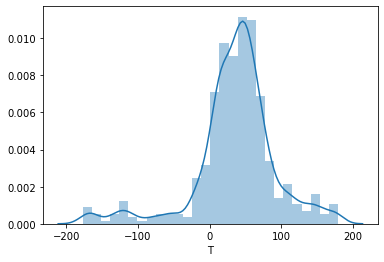

In [10]:
sns.distplot(df['T'].dropna())

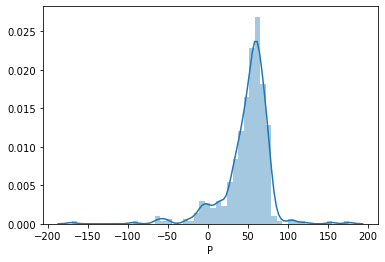

In [11]:
sns.distplot(df['P'].dropna())

In [12]:
df['T'].fillna(df['T'].mean(),inplace=True)

In [13]:
df['P'].fillna(df['P'].mean(),inplace=True)

In [14]:
df.drop(columns=['J'],inplace=True)

In [15]:
df.dropna(inplace=True)

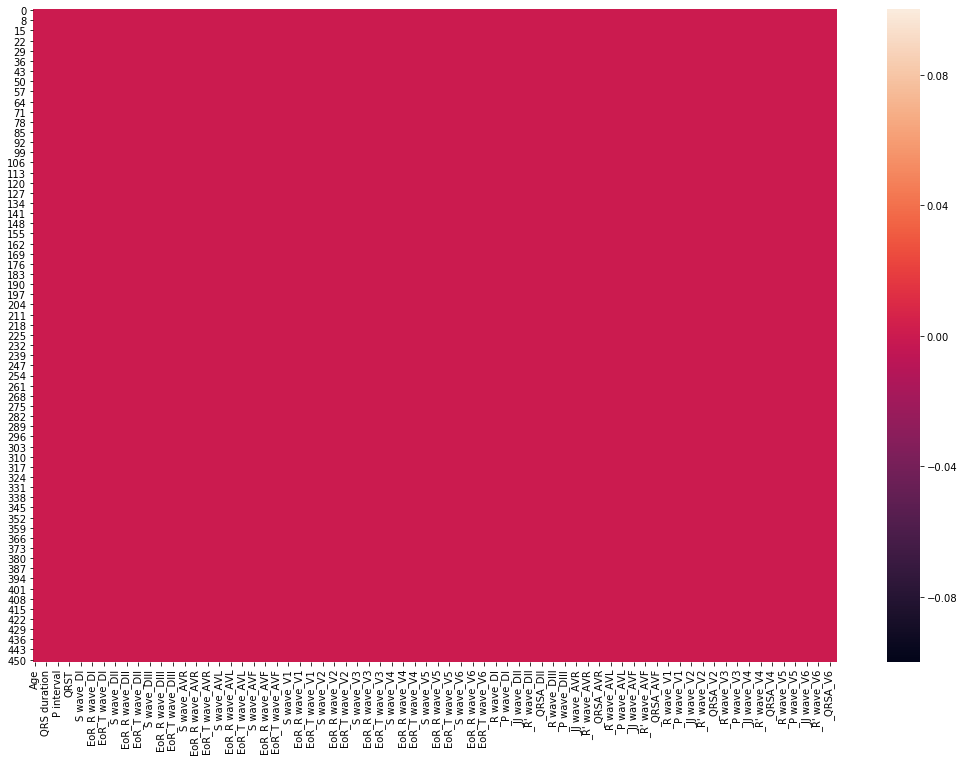

In [16]:
plt.figure(figsize=(18,12))
sns.heatmap(df.isna())

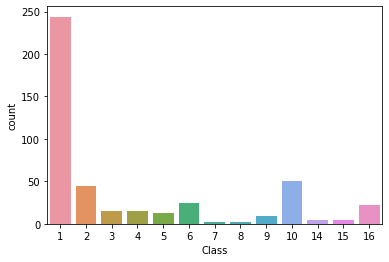

In [17]:
sns.countplot('Class',data=df)

In [18]:
df['Class'].value_counts()

1     244
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
8       2
7       2
Name: Class, dtype: int64

# Training First Model

In [19]:
X=df.drop(columns=['Class'])
y=df['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf=RandomForestClassifier()

In [24]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_pred=clf.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report

In [27]:
accuracy_score(y_test,y_pred)

0.7555555555555555

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.95      0.87        56
           2       0.75      0.67      0.71         9
           3       0.67      1.00      0.80         2
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.62      0.71      0.67         7
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.76        90
   macro avg       0.44      0.42      0.41        90
weighted avg       0.68      0.76      0.71        90



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=2)

In [31]:
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 0.6888888888888889 (+/- 0.026666666666666616)


# Finding and removing correlated features

In [32]:
# Build a func. to create a set of highly correlatedolumns

def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names

col=correlation(x_train,0.8)
print('Correlated columns:',col) 

Correlated columns: {"_S' wave_DII", '_Q wave_V4', "_S' wave_AVF", "_S' wave_V4", '_Q wave_AVF', '_Q wave_DII', '_R wave_AVF', "_R' wave_V2", '_T wave_V5', "_R' wave_DIII", '_QRSTA_DIII', '_Q wave_V5', '_T wave_AVF', '_QRSA_AVF', '_Q wave_V2', '_R wave_V3', '_QRSTA_V6', "_S' wave_DIII", '_JJ wave_AVR', "_R' wave_AVR", '_QRSA_AVL', '_QRSTA_AVL', 'No_ID_V3', '_Q wave_DI', "_R' wave_DII", '_S wave_V6', "_R' wave_V6", "_S' wave_V3", '_JJ wave_V4', '_P wave_AVF', '_P wave_V6', '_T wave_AVR', "_R' wave_AVL", 'No_ID_V6', "_S' wave_AVR", '_T wave_AVL', 'EoR_P wave_V6', '_R wave_V6', "_R' wave_V5", "_R' wave_AVF", '_Q wave_V3', '_QRSTA_V5', '_S wave_AVF', "_R' wave_DI", '_S wave_AVR', '_R wave_AVL', '_Q wave_AVL', 'S wave_V1', "_S' wave_V2", '_Q wave_V6', '_JJ wave_AVL', "_R' wave_V3", '_Q wave_V1', '_T wave_V6', "_R' wave_V4", "S' wave_V3", '_QRSTA_AVF', "_S' wave_V1", 'Q wave_V6', '_P wave_V5', '_QRSA_V4'}


In [33]:
df1=df.drop(columns=col)

In [34]:
X=df1.drop(columns=['Class'])
y=df1['Class']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Training model with new sets of features

In [36]:
clf=RandomForestClassifier()

In [37]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred=clf.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,classification_report

In [40]:
accuracy_score(y_test,y_pred)

0.7555555555555555

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.79      0.95      0.86        56
           2       0.80      0.44      0.57         9
           3       0.67      1.00      0.80         2
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         6
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.50      0.71      0.59         7
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.76        90
   macro avg       0.48      0.43      0.43        90
weighted avg       0.72      0.76      0.71        90



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
scores = cross_val_score(RandomForestClassifier(), X, y, cv=2)

In [43]:
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 0.6977777777777778 (+/- 0.053333333333333344)
